In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
image_info = pd.concat([
    pd.read_csv('perception_count/datasets/image_info/1_A.csv'),
    pd.read_csv('perception_count/datasets/image_info/1_B.csv')]).set_index('image_id')

In [6]:
amakasu = pd.concat([
    pd.read_csv(
        'perception_count/result/amakasu_1_A_1.csv',
        usecols=['image_id', 'pred_amakasu']),
    pd.read_csv(
        'perception_count/result/amakasu_1_B_1.csv',
        usecols=['image_id', 'pred_amakasu'])]
    ).sort_values(by='image_id').set_index('image_id')
sato = pd.concat([
    pd.read_csv('perception_count/result/sato_1_A_0.csv',
        usecols=['image_id', 'pred_sato']),
    pd.read_csv('perception_count/result/sato_1_B_0.csv',
        usecols=['image_id', 'pred_sato'])]
    ).sort_values(by='image_id').set_index('image_id')
shigemi = pd.concat([
    pd.read_csv('perception_count/result/shigemi_1_A_0.csv',
        usecols=['image_id', 'pred_shigemi']),
    pd.read_csv('perception_count/result/shigemi_1_B_1.csv',
        usecols=['image_id', 'pred_shigemi'])]
    ).sort_values(by='image_id').set_index('image_id')
yuki = pd.concat([
    pd.read_csv('perception_count/result/yuki_1_A_1.csv',
        usecols=['image_id', 'pred_yuki']),
    pd.read_csv('perception_count/result/yuki_1_B_0.csv',
        usecols=['image_id', 'pred_yuki'])]
    ).sort_values(by='image_id').set_index('image_id')

In [7]:
result = image_info.join(
    [amakasu, sato, shigemi, yuki]).applymap(
    lambda x: np.nan if x > 100 else x)

In [22]:
result.to_csv('result.csv')

In [5]:
result.max()

num             20.0
time             1.0
pred_amakasu    20.0
pred_sato       20.0
pred_shigemi    17.0
pred_yuki       15.0
dtype: float64

In [9]:
alpha = 0.2

In [23]:
result_all = pd.concat([
    image_info.join(amakasu.rename(columns={'pred_amakasu': 'pred'})),
    image_info.join(sato.rename(columns={'pred_sato': 'pred'})),
    image_info.join(shigemi.rename(columns={'pred_shigemi': 'pred'})),
    image_info.join(yuki.rename(columns={'pred_yuki': 'pred'}))])

In [24]:
result_all.to_csv('result_all.csv')

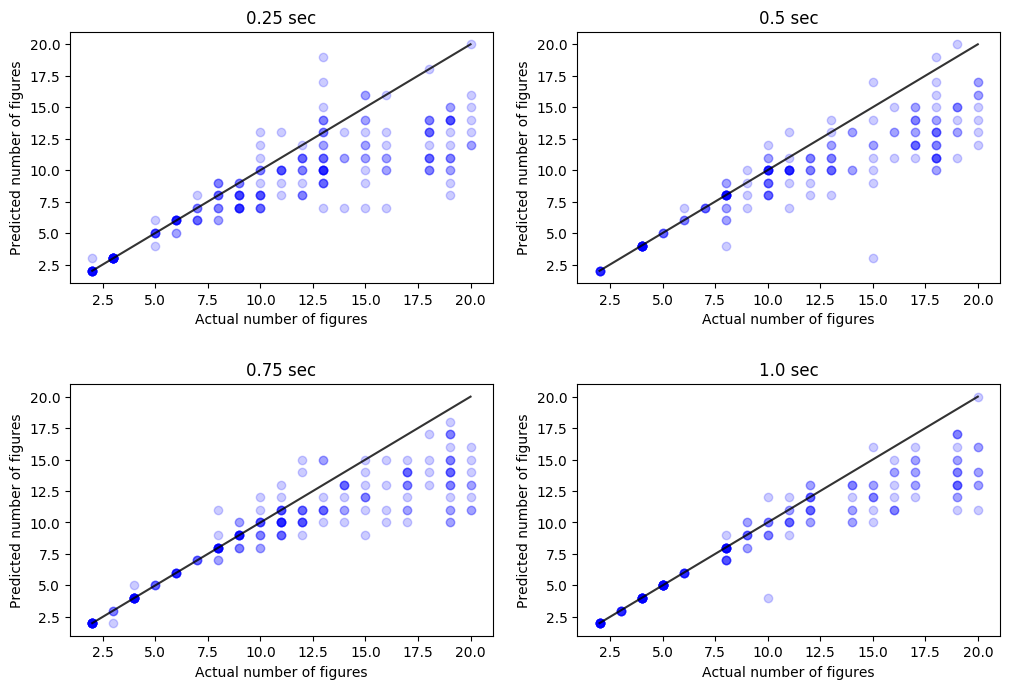

In [130]:
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True
plt.rcParams['figure.subplot.hspace'] = 0.4
plt.rcParams['figure.dpi'] = 100
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
names = ['amakasu', 'sato', 'shigemi', 'yuki']
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result[result.time == t]
    axes[ax//2, ax%2].plot(
            range(2, 21), range(2, 21), alpha=0.8, color='black',
            label='Actual')
    #axes[ax//2, ax%2].legend()
    for n in names:
        axes[ax//2, ax%2].scatter(
            result_t.num, result_t[f'pred_{n}'],
            alpha=alpha, color='blue')
    
    axes[ax//2, ax%2].set_ylim(1, 21)
    axes[ax//2, ax%2].set_xlabel('Actual number of figures')
    axes[ax//2, ax%2].set_ylabel('Predicted number of figures')
    axes[ax//2, ax%2].set_title(f'{t} sec')


plt.savefig('scatter.png')

/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


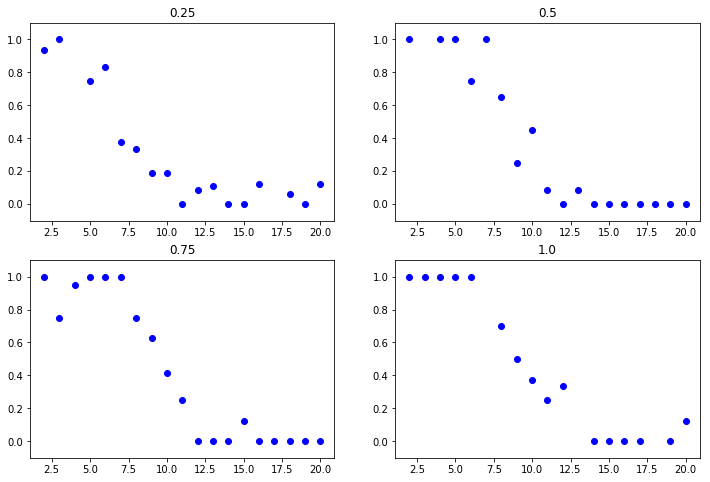

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
names = ['amakasu', 'sato', 'shigemi', 'yuki']
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result_all[result_all.time == t]
    result_t[f'correct'] = result_t[[f'pred']].apply(lambda x: x == result_t.num)
    accucary = result_t.groupby('num').sum()[f'correct'] /\
        result_t.groupby('num').count()['time']
    axes[ax//2, ax%2].scatter(accucary.index, accucary, alpha=1, color='blue')
    axes[ax//2, ax%2].set_title(t)
    axes[ax//2, ax%2].set_ylim(-0.1, 1.1)
plt.show()

/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


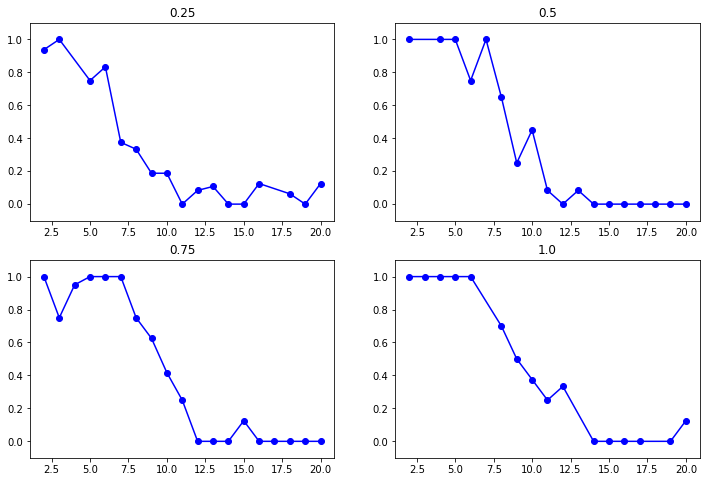

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
names = ['amakasu', 'sato', 'shigemi', 'yuki']
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result[result.time == t]
    for n in names:
        result_t[f'correct_{n}'] = result_t[[f'pred_{n}']].apply(lambda x: x == result_t.num)
    accucary = sum(
        [result_t.groupby('num').sum()[f'correct_{n}'] for n in names]) /\
        result_t.groupby('num').count()['time'] / len(names)
    axes[ax//2, ax%2].plot(accucary.index, accucary, marker='o', color='blue')
    axes[ax//2, ax%2].set_title(t)
    axes[ax//2, ax%2].set_ylim(-0.1, 1.1)
plt.show()

In [97]:
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result_all[result_all.time == t]
    result_t['correct'] = result_t[['pred']].apply(
        lambda x: x == result_t.num)
    result_t['correct'] = result_t[
        ['pred']].apply(lambda x: x == result_t.num)
    accuracy = result_t.groupby('num').sum().correct / \
        result_t.groupby('num').count()['time']
    accuracy.to_frame().to_csv(f'accuracy_{t}.csv', index=False)

/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


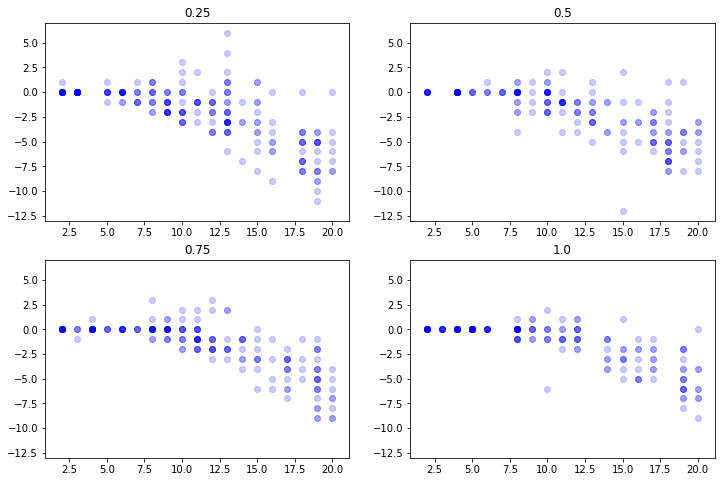

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
names = ['amakasu', 'sato', 'shigemi', 'yuki']
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result[result.time == t]
    for n in names:
        result_t[f'error_{n}'] = result_t[f'pred_{n}'] - result_t.num
        axes[ax//2, ax%2].scatter(result_t.num, result_t[f'error_{n}'], alpha=alpha, color='blue')
    axes[ax//2, ax%2].set_title(t)
    axes[ax//2, ax%2].set_ylim(-13, 7)
plt.show()

/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


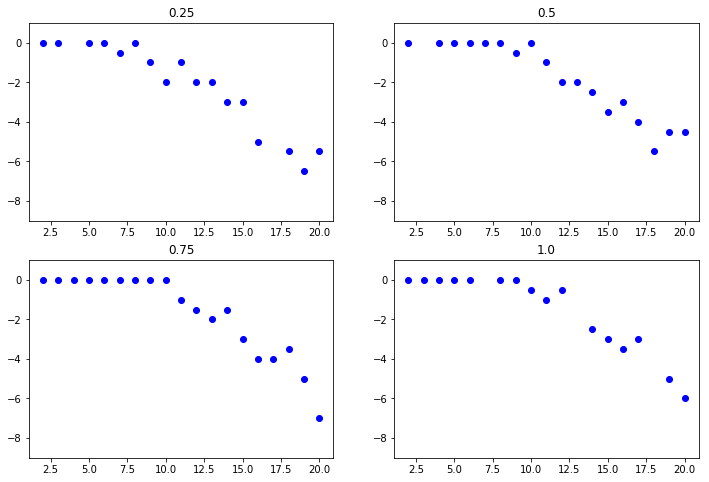

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
names = ['amakasu', 'sato', 'shigemi', 'yuki']
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result_all[result_all.time == t]
    result_t[f'error'] = result_t[f'pred'] - result_t.num
    med = result_t.groupby('num').median()
    axes[ax//2, ax%2].scatter(
        med.index, med[f'error'],
        alpha=1, color='blue')
    axes[ax//2, ax%2].set_title(t)
    axes[ax//2, ax%2].set_ylim(-9, 1)
plt.show()

/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


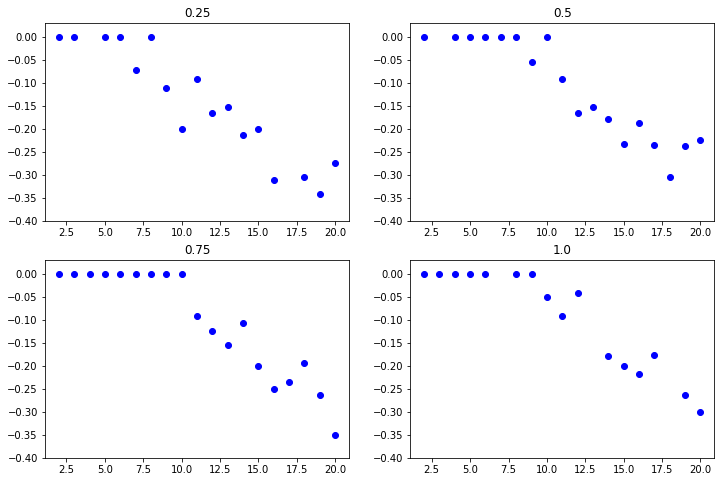

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
names = ['amakasu', 'sato', 'shigemi', 'yuki']
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result_all[result_all.time == t]
    result_t[f'error'] = result_t[f'pred'] - result_t.num
    med = result_t.groupby('num').median()
    axes[ax//2, ax%2].scatter(
        med.index, med.error / med.index,
        alpha=1, color='blue')
    axes[ax//2, ax%2].set_title(t)
    axes[ax//2, ax%2].set_ylim(-0.4, 0.03)
plt.show()

/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


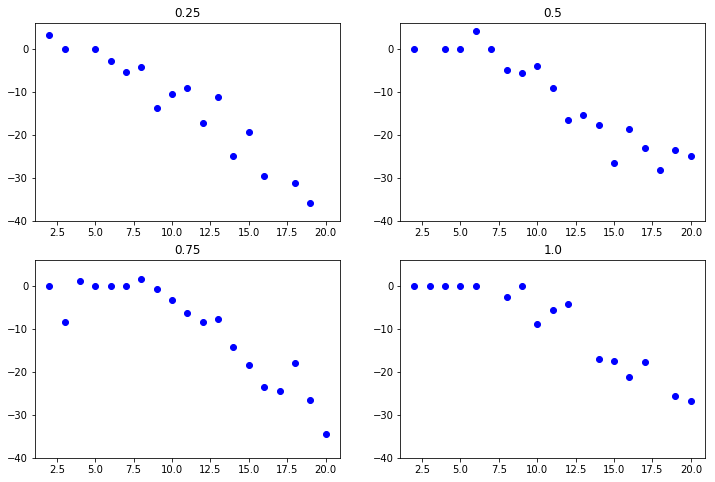

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
names = ['amakasu', 'sato', 'shigemi', 'yuki']
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result_all[result_all.time == t]
    result_t[f'error'] = result_t[f'pred'] - result_t.num
    avg = result_t.groupby('num').mean()
    axes[ax//2, ax%2].scatter(
        avg.index, avg.error / avg.index * 100,
        alpha=1, color='blue')
    axes[ax//2, ax%2].set_title(t)
    axes[ax//2, ax%2].set_ylim(-40, 6)
plt.show()

In [76]:
t

1.0

In [77]:
avg

,time,pred,error,error_rate
num,,,,
2,0.650000,2.016667,0.016667,0.833333
3,0.472222,2.972222,-0.027778,-0.925926
4,0.750000,4.016667,0.016667,0.416667
5,0.775000,5.000000,0.000000,0.000000
6,0.593750,5.968750,-0.031250,-0.520833
7,0.437500,6.812500,-0.187500,-2.678571
8,0.661765,7.794118,-0.205882,-2.573529
9,0.590909,8.465116,-0.534884,-5.943152
10,0.553571,9.357143,-0.642857,-6.428571


In [98]:
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result_all[result_all.time == t]

    result_t['error'] = result_t.pred - result_t.num
    med = result_t.groupby('num').median()
    med['error_rate'] = med.error / med.index * 100
    med.error_rate.to_frame().to_csv(f'error_rate_{t}.csv', index=True)

/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [110]:
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    pd.read_csv(f'error_rate_{t}.csv', index_col='num').fillna(
        method='ffill').to_csv(f'error_rate_{t}.csv', index=True)

In [109]:
pd.read_csv('error_rate_0.25.csv', index_col='num').fillna(
    method='ffill')

,error_rate
num,
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,-7.142857
8,0.000000
9,-11.111111
10,-20.000000


/home/neko/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


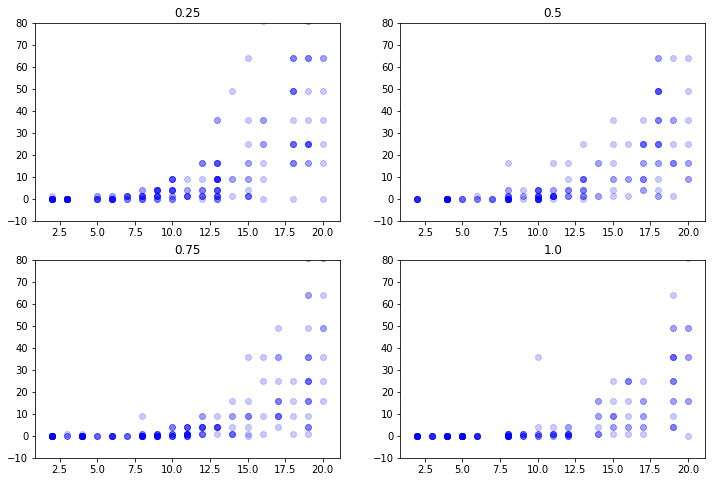

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
names = ['amakasu', 'sato', 'shigemi', 'yuki']
for ax, t in enumerate([0.25, 0.5, 0.75, 1.]):
    result_t = result[result.time == t]
    for n in names:
        result_t[f'error_{n}'] = (result_t[f'pred_{n}'] - result_t.num) ** 2
        axes[ax//2, ax%2].scatter(result_t.num, result_t[f'error_{n}'], alpha=alpha, color='blue')
    axes[ax//2, ax%2].set_title(t)
    axes[ax//2, ax%2].set_ylim(-10, 80)
plt.show()